In [3]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import psycopg2
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV


pd.set_option('display.max_rows', None) #magic command
pd.set_option('display.max_columns', None)


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
main_data = pd.read_csv('main_data.csv')

In [5]:
main_data.head(10)

,Absolute Lymphocyte Count,Absolute Neutrophil Count,Alanine Aminotransferase (ALT),Albumin,Alkaline Phosphatase,Asparate Aminotransferase (AST),Basophils,"Bilirubin, Total",C-Reactive Protein,"Cholesterol, HDL","Cholesterol, LDL, Calculated","Cholesterol, Total",Creatine Kinase (CK),Creatinine,Eosinophils,Globulin,Hematocrit,Hemoglobin,Lactate Dehydrogenase (LD),MCV,Monocytes,Neutrophils,PT,Platelet Count,Potassium,RBC,RDW,Sodium,Urea Nitrogen,Uric Acid,WBC,LOS
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.700000,0.000000,0.0,30.100000,9.600000,0.0,95.000000,0.000000,0.000000,0.000000,265.500000,0.000000,2.0,13.866667,0.000000,19.000000,0.0,5.000000,2.589583
1,0.700909,4.147879,81.604651,4.028571,147.642857,40.697674,0.609091,1.100000,15.8,0.0,0.0,0.000000,0.000000,0.867391,0.745455,0.0,31.412000,10.584000,250.0,92.574468,7.636364,72.663636,11.526316,162.270833,4.258333,0.0,14.846939,137.888889,17.521739,0.0,0.000000,4.645139
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.466667,0.000000,0.0,0.0,0.0,0.000000,98.666667,0.966667,5.666667,0.0,30.580000,10.320000,0.0,89.000000,7.566667,58.266667,13.300000,193.600000,4.240000,0.0,13.480000,138.800000,24.500000,0.0,0.000000,1.553472
3,1.436667,8.036667,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.0,105.5,0.0,220.500000,0.000000,0.763636,1.033333,0.0,38.571429,12.661538,0.0,97.769231,6.966667,73.466667,11.900000,344.846154,4.225000,0.0,12.446154,141.500000,10.363636,0.0,0.000000,4.954861
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.400000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,2.587500
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.800000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,4.113889
6,1.297500,5.290000,14.500000,0.000000,69.666667,23.000000,0.240000,0.266667,0.0,74.5,117.0,191.833333,0.000000,0.872222,1.180000,0.0,40.353333,12.566667,0.0,83.600000,4.813333,73.273333,0.000000,355.466667,3.940000,2.0,16.180000,140.733333,12.235294,0.0,3.750000,8.871528
7,0.000000,0.000000,28.666667,3.250000,109.333333,121.166667,0.200000,5.383333,0.0,0.0,0.0,0.000000,0.000000,0.500000,1.566667,0.0,21.884615,7.523077,223.0,87.100000,7.600000,69.100000,14.516667,48.400000,3.533333,9.0,19.140000,135.166667,9.666667,0.0,21.500000,5.709722
8,0.515217,7.053478,22.666667,3.620000,109.500000,26.000000,0.604348,0.980000,0.0,0.0,0.0,0.000000,0.000000,2.640404,10.460870,0.0,29.260870,8.889130,0.0,99.122222,9.234783,73.191304,20.687879,242.065934,4.338298,55.0,17.542857,141.516129,60.572917,0.0,24.833333,7.926389
9,1.360000,6.810000,18.333333,4.066667,62.666667,16.000000,1.040000,0.300000,0.0,90.0,0.0,246.000000,0.000000,3.357143,4.400000,0.0,31.790000,10.215789,176.0,91.526316,9.880000,69.820000,11.875000,240.105263,5.200000,40.5,13.700000,138.928571,49.500000,6.8,21.600000,11.025694


In [6]:
main_data.describe()

,Absolute Lymphocyte Count,Absolute Neutrophil Count,Alanine Aminotransferase (ALT),Albumin,Alkaline Phosphatase,Asparate Aminotransferase (AST),Basophils,"Bilirubin, Total",C-Reactive Protein,"Cholesterol, HDL","Cholesterol, LDL, Calculated","Cholesterol, Total",Creatine Kinase (CK),Creatinine,Eosinophils,Globulin,Hematocrit,Hemoglobin,Lactate Dehydrogenase (LD),MCV,Monocytes,Neutrophils,PT,Platelet Count,Potassium,RBC,RDW,Sodium,Urea Nitrogen,Uric Acid,WBC,LOS
count,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000
mean,0.797601,2.483732,21.414907,1.759768,41.609218,24.344796,0.357039,2.196842,1.469003,14.369260,20.026186,48.017517,59.810394,0.767095,1.427378,0.364611,30.179312,10.029005,64.564216,72.945650,4.696611,49.647195,7.872477,196.394021,2.887386,4.258130,11.384415,95.300423,13.374446,0.478820,5.666461,3.678673
std,2.962809,4.113400,78.936674,1.999690,47.963334,105.121730,0.348558,3.546863,12.603858,25.806079,42.674594,82.767041,2743.542732,0.847094,1.731048,0.955064,15.773824,5.347225,133.536085,36.658473,3.603205,31.762866,7.816306,128.213248,1.926564,22.024139,5.837320,64.508366,12.928863,1.656549,24.067451,3.264760
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012500
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.658333,9.300000,0.000000,81.500000,0.000000,0.000000,0.000000,137.928571,0.000000,0.000000,12.359412,0.000000,0.000000,0.000000,0.000000,1.680903
50%,0.000000,0.000000,10.000000,0.000000,0.000000,13.833333,0.312500,0.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,1.000000,0.000000,35.299398,11.745455,0.000000,88.928571,5.000000,62.772222,10.900000,215.214286,3.900000,0.000000,13.340000,137.586667,12.500000,0.000000,0.000000,2.629861
75%,1.400000,4.540000,23.166667,3.952778,76.196429,25.000000,0.550000,2.507381,0.000000,29.214286,0.000000,115.500000,0.000000,0.966667,2.145000,0.000000,39.900000,13.400000,134.000000,93.141429,7.000000,73.041667,12.800000,272.187500,4.200000,1.707143,14.514061,139.905506,18.000000,0.000000,2.000000,4.552083
max,172.761250,36.355000,2722.500000,5.300000,209.000000,2684.333333,3.300000,41.011111,290.100000,137.000000,270.000000,366.500000,187541.666667,15.250000,27.000000,5.900000,66.800000,24.800000,2119.500000,120.000000,36.853333,95.200000,103.800000,2743.000000,9.500000,578.500000,26.200000,163.000000,166.071429,13.200000,592.500000,18.122917


# Linear Regression

#### a line can be expressed as 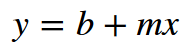


#### you can solve the equation for b and m as follows:
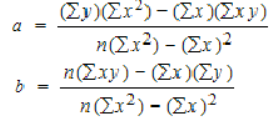



#### In machine learning, 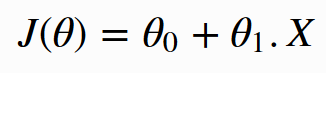
y = hypothesis and represent it as J(theta) and 
b as theta0 and m as theta1.
This model is just a linear function of the input feature, X. 
theta0 and theta1 are the model’s parameters

J(theta) is the output variable. It is also called the target variable in machine learning, or the dependent variable in statistical modeling. It represents the continuous value that we are trying to predict. 

X is the input variable. In machine learning, x is referred to as the feature, while in statistics, it is called the independent variable. It represents the information given to us at any given time.

theta0 is the bias term or y-axis intercept. theta1 is the regression coefficient or scale factor. In classical statistics, it is the equivalent of the slope on the best-fit straight line that is produced after the linear regression model has been fitted.

##### The most common performance measure of a regression model is the Root Mean Square Error (RMSE)[cost function, j]. Therefore, to train a Linear Regression model, we need to find the value of 'theta0' and 'theta1' that minimizes the RMSE. In practice, it is simpler to minimize the mean squared error (MSE) than the RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root).

In [7]:
import math
import operator

In [8]:
X = main_data['Urea Nitrogen'].values
y = main_data['LOS'].values

In [9]:
y.shape

(4687,)

Saving figure generated_data_plot


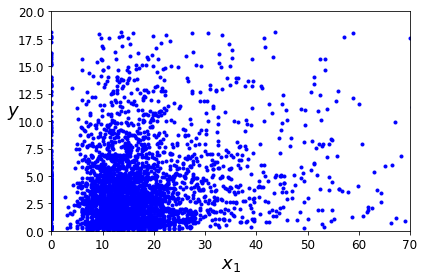

In [11]:

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 70, 0, 20])
save_fig("generated_data_plot")
plt.show() 

In [12]:
# calculate mean of x & y using an inbuilt numpy method mean()
mean_x = np.mean(X)
mean_y = np.mean(y)


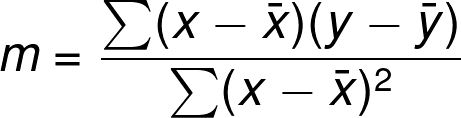

In [13]:
# total no.of input values 
m = len(X)

# using the formula to calculate m & c
numer = 0
denom = 0
for i in range(m):
  numer += (X[i] - mean_x) * (y[i] - mean_y)
  denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

print (f'm = {m} \nc = {c}')

m = 0.05134141233261055 
c = 2.9920103333840955


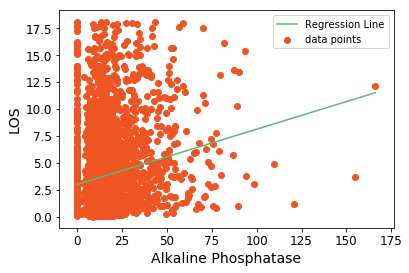

In [14]:
# plotting values and regression line
max_x = np.max(X) 
min_x = np.min(y) 

# calculating line values x and y
x = np.linspace (min_x, max_x, 100)
Y = c + m * x

plt.plot(x, Y, color='#58b970', label='Regression Line')
plt.scatter(X, y, c='#ef5423', label='data points')

plt.xlabel('Alkaline Phosphatase')
plt.ylabel('LOS')
plt.legend()
plt.show()

# mathematical representation of R2 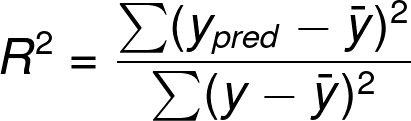

In [15]:
# calculating R-squared value for measuring goodness of fit of our model. 

ss_t = 0 #total sum of squares
ss_r = 0 #total sum of square of residuals


for i in range(int(len(X))): # val_count represents the no.of input x values
  y_pred = c + m * X[i]
  ss_t += (y[i] - mean_y) ** 2
  ss_r += (y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print(r2)

0.04133840116322751


In [16]:
#Fitting Simple linear Regression to the Training set
X = X.reshape(len(X), 1)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)
print('Linear Regression Intercept: \n', regressor.intercept_)
print('Linear Regresion Coefficients: \n', regressor.coef_)

print("Predictions:", y_pred)

Linear Regression Intercept: 
 2.9920103333840924
Linear Regresion Coefficients: 
 [0.05134141]
Predictions: [3.96749717 3.89160117 4.24987494 ... 3.45408304 3.82374121 2.99201033]


In [17]:
lin_r2 = r2_score(y, y_pred)
print('lin_r2:', lin_r2 )

lin_r2: 0.041338401163232064


# Example from Geron's textbook

In [18]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


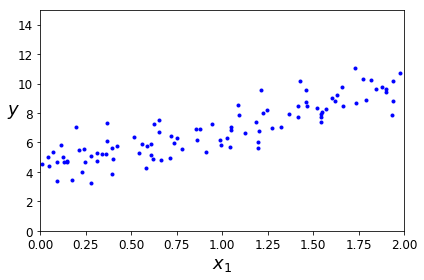

In [19]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

# Analytical way of Linear Regression

In [20]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance for ease of matrix multiplication to solve for Theta
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # analytical way to solve for the Theta0 and Theta1 

In [21]:
theta_best

array([[4.21509616],
       [2.77011339]])

##### This is close to real thetas 4 and 3. It cannot be accurate due to the noise  in the data

In [22]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Saving figure linear_model_predictions_plot


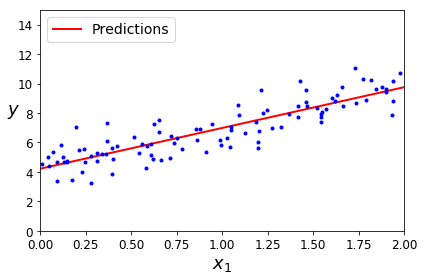

In [23]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [25]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

# Gradient Descent
#### To update 'theta0' and 'theta1' values in order to reduce cost function (minimizing RMSE value) and achieving the best fit line, the model uses Gradient Descent. The idea is to start with random 'thet0' and 'theta1' values and then iteratively updating the values, reaching minimum cost function.

#### An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter.

#### To implement Gradient Descent, you need to compute the gradient of the cost function with regard to each model parameter theta0 and theta1. In other words, you need to calculate how much the cost function will change if you change θ just a little bit.  This is called partial derivative (helps to find the theta for next iteration).

#### The cost function equation:
Cost $$ J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 $$


#### Gradient vector of the cost function equation:

Gradient

$$ \frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)} $$

where m is the no. of observations




#### Gradients:

Gradients $$ \theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)}) $$ $$ \theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)}) $$ $$ \theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)}) $$

$$ \theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)}) $$

 where alpha = Learning Rate

#### To write the gradient descent, we need, a cost function which calculates cost, a gradient descent function which calculates new Theta vector 

In [26]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [27]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

# Linear regression using batch gradient descent
it uses the whole batch of training data at every step 

In [28]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.903,
Theta1:          3.046
Final cost/MSE:  4180.375


#### We get theta0 = 3.903  and theta1 = 3.046 which is very close to our actual values of 4 and 3 for theta0 and theta1 respectively

### Plot of the cost history over iterations

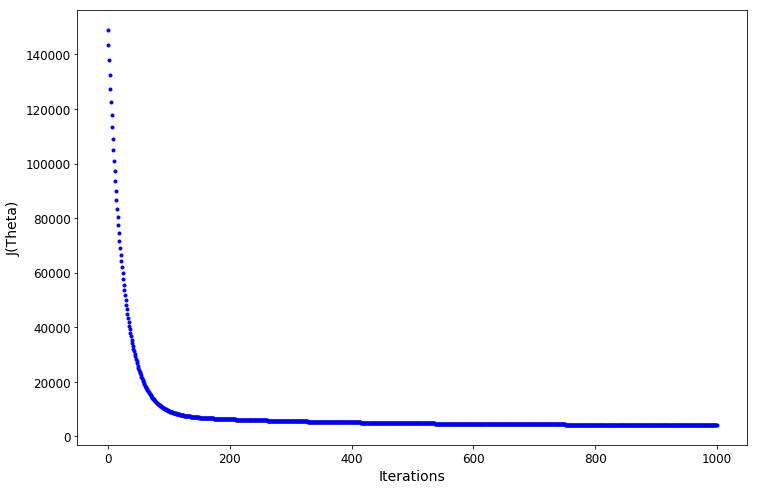

In [29]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

#### After around 150 iterations the cost is flat so the remaining iterations are not needed or will not result in any further optimization. Let us zoom in till iteration 200 and see the curve

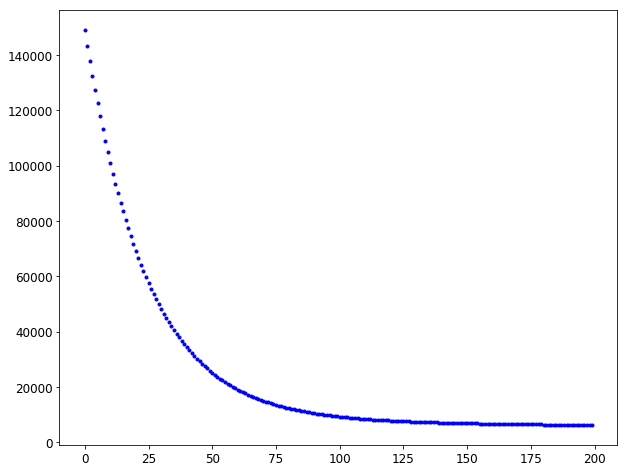

In [30]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

#### the cost drops (RMSE) faster initially and then the gain in cost reduction is not as much

In [31]:
### The effect of different learning rates and iterations together

In [32]:
def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

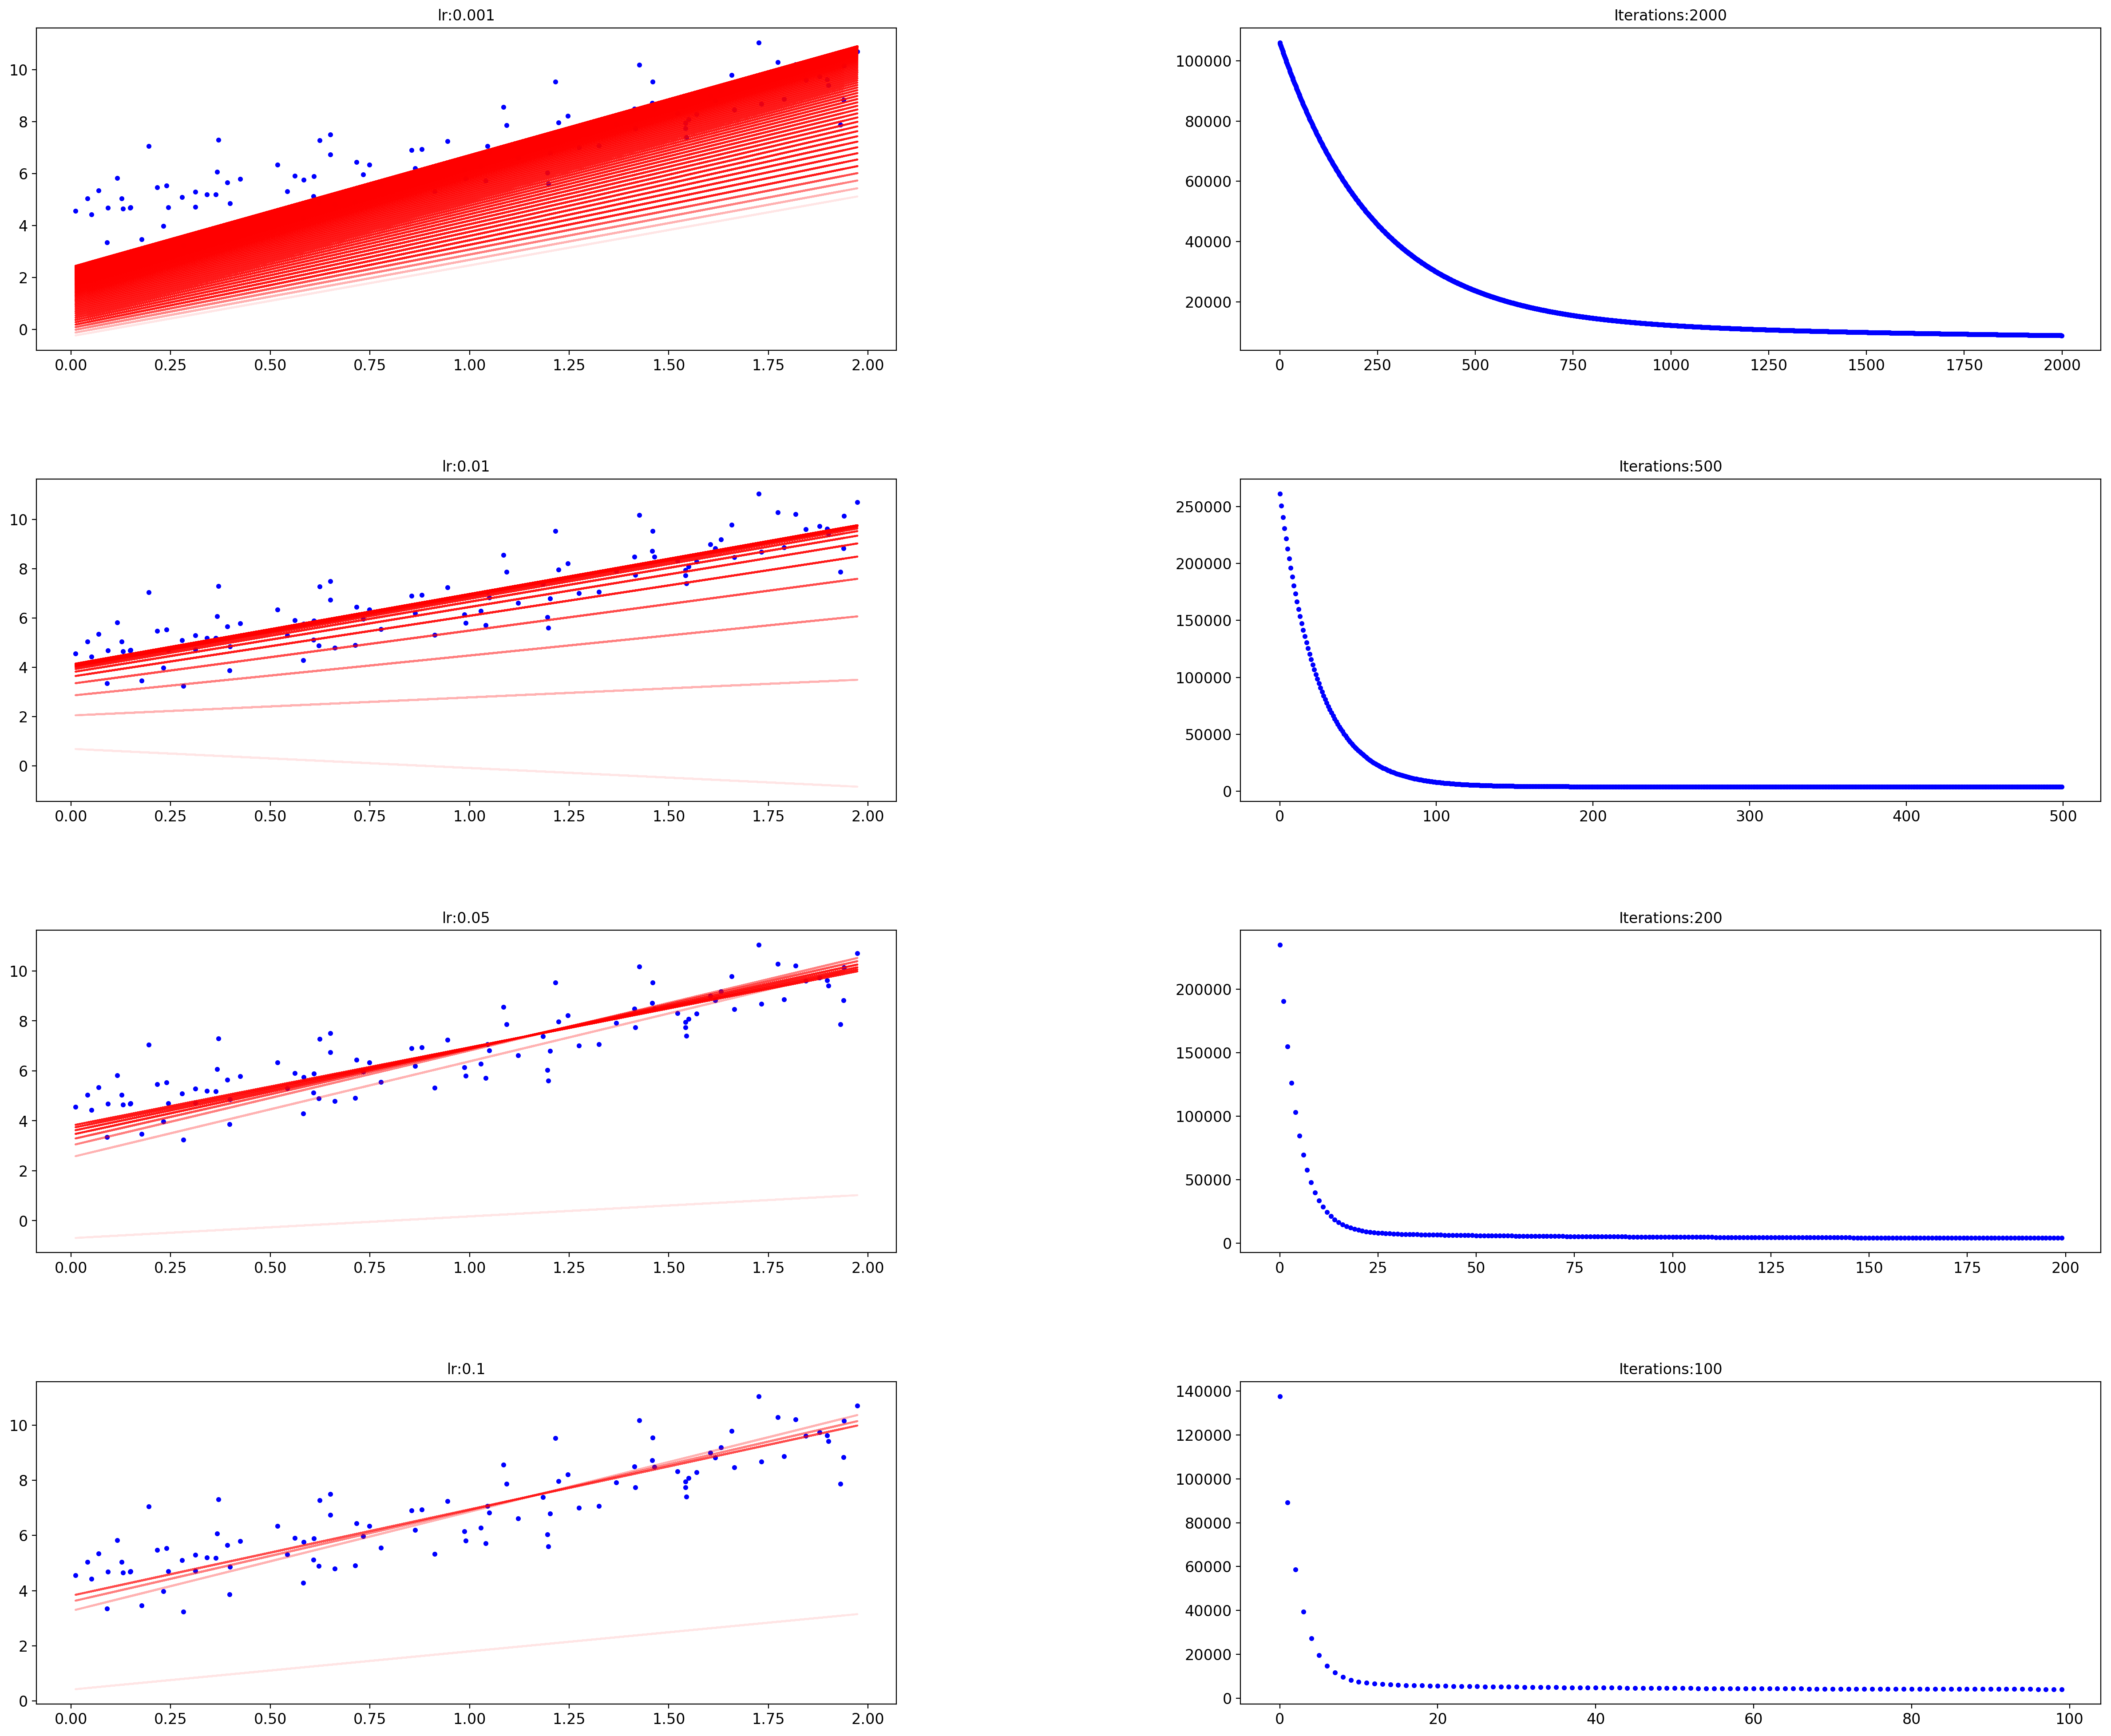

In [33]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)

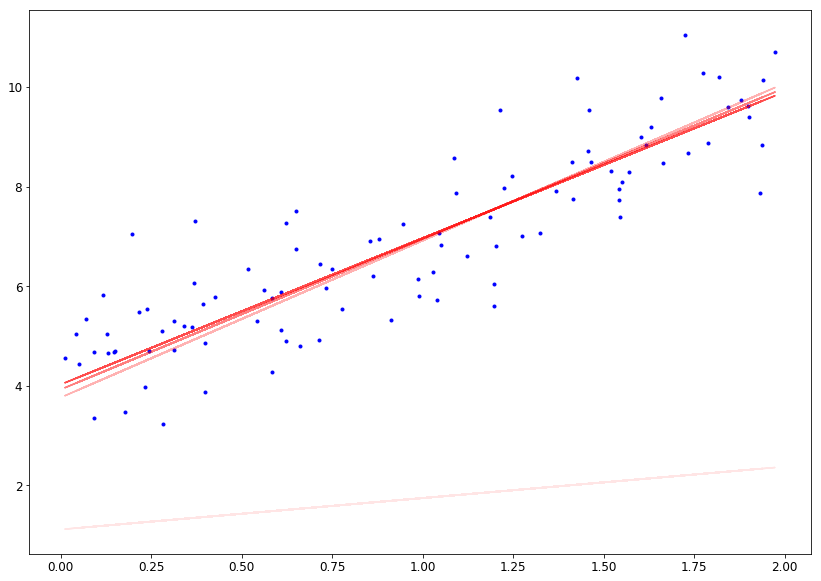

In [34]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.1,ax)

#### With small learning rates it takes long to converge to the solution whereas with with larger learning rates it is quicker.

# Stochastic Gradient Descent

#### In stochastic gradient descent we can chose the random observations randomly. It is called stochastic because samples are selected randomly (or shuffled) instead of as a single group (as in standard gradient descent) or in the order they appear in the training set.


In [35]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [36]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.147,
Theta1:          2.732
Final cost/MSE:  48.483


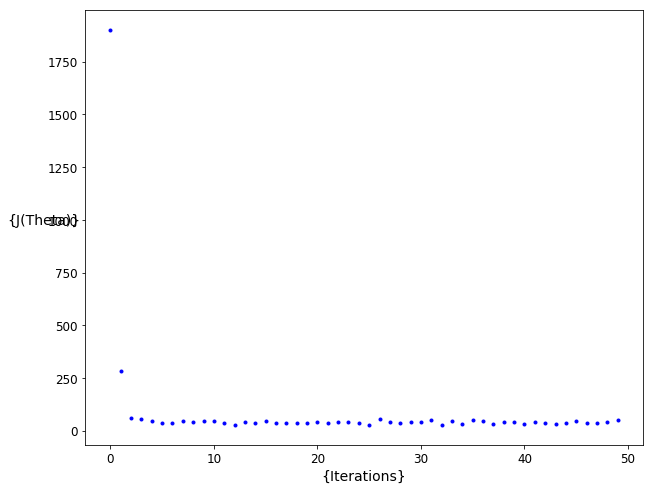

In [37]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

### Regression using Stochastic GD with Scikit-Learn

In [38]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [39]:
sgd_reg.intercept_, sgd_reg.coef_


(array([4.24365286]), array([2.8250878]))

# Mini Batch Gradient Descent

#### This approach uses random samples but in batches. What this means is that we do not calculate the gradients for each observation but for a group of observations which results in a faster optimization.A simple way to implement is to shuffle the observations and then create batches and then proceed with gradient descent using batches.

In [40]:

def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [41]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.169,
Theta1:          2.809
Final cost/MSE:  805.887


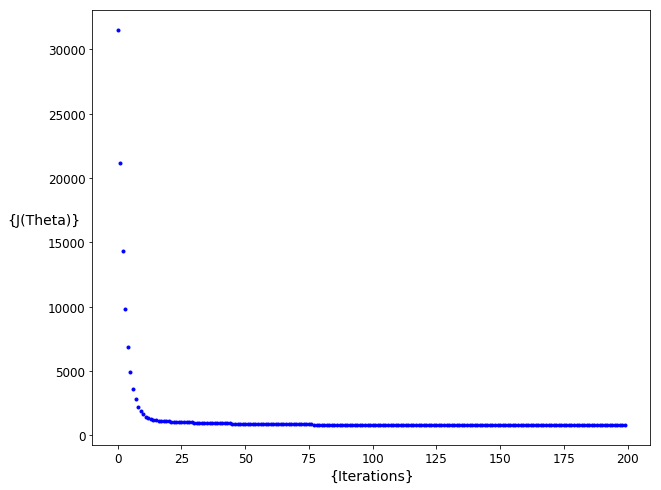

In [42]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

In [43]:
## References

# https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f
# https://medium.com/geekculture/linear-regression-from-scratch-in-python-without-scikit-learn-a06efe5dedb6
# https://www.keboola.com/blog/linear-regression-machine-learning